# mp4からの学習データ作成

走行動画にラベリングし学習データを作成する、オフライン(windowsPC)でも可

In [1]:
TASK = 'off001'

In [2]:
input_video = 'movie/slowdrive.mp4'

In [3]:
import numpy as np                 # NumPy
import cv2                         # openCV
import glob                        # Filename pattern matching
import matplotlib.pyplot as plt    # 2D plotting
import matplotlib.image as mpimg
import ipywidgets as widgets
from ipywidgets import Textarea,Layout
%matplotlib notebook
import time
import os,subprocess,datetime

In [4]:
t_delta=datetime.timedelta(hours=9)
JST=datetime.timezone(t_delta,'JST')
tm=datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9))).strftime("%Y%m%d%H%M%S")

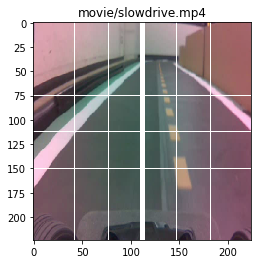

Textarea(value='', description='ログ', layout=Layout(flex='0 1 auto', height='100px', min_height='100px', width=…

In [5]:
video = cv2.VideoCapture(input_video) # 引数がファイルパス

width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH)) # 動画の画面横幅
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)) # 動画の画面縦幅
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # 総フレーム数
frame_rate = int(video.get(cv2.CAP_PROP_FPS)) # フレームレート(fps)
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

l = Layout(flex='0 1 auto', height='100px', min_height='100px', width='auto')
process_widget = Textarea(description='ログ', value='', layout=l)
def write_log(msg):
    global process_widget
    process_widget.value = msg + "\n" + process_widget.value

fig = plt.figure()

image = np.zeros((244, 244, 3), np.uint8)

def skip_frame_and_show(nframe):
    global image
    plt.clf()
    for i in range(nframe):
        ret,img_tmp = video.read()
        if not ret:
            write_log('end of movie')
            return
    image = cv2.resize(img_tmp, dsize=(224,224))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.line(img,(112,0),(112,224),(255,255,255),3)
    img = cv2.line(img,( 77,0),( 77,224),(255,255,255),1)
    img = cv2.line(img,( 42,0),( 42,224),(255,255,255),1)
    img = cv2.line(img,(147,0),(147,224),(255,255,255),1)
    img = cv2.line(img,(182,0),(182,224),(255,255,255),1)
    img = cv2.line(img,(0, 75),(224, 75),(255,255,255),1)
    img = cv2.line(img,(0,112),(224,112),(255,255,255),1)
    img = cv2.line(img,(0,150),(224,150),(255,255,255),1)
    plt.imshow(img)
    plt.title(input_video)
    plt.show()
    #write_log('advanced %d frames' % nframe)

skip_frame_and_show(1)
    
button01 = widgets.Button(description='+1')
def on_click_01(clicked_button: widgets.Button) -> None:
         skip_frame_and_show(1)
button01.on_click(on_click_01)

button10 = widgets.Button(description='+10')
def on_click_10(clicked_button: widgets.Button) -> None:
         skip_frame_and_show(10)
button10.on_click(on_click_10)

button30 = widgets.Button(description='+30')
def on_click_30(clicked_button: widgets.Button) -> None:
         skip_frame_and_show(30)
button30.on_click(on_click_30)


txt = Textarea(
    value='',
    placeholder='data',
    description='event:',
    disabled=False,
    layout=Layout(width='50%', height='40px'))

category_path = 'data/'+TASK+'_A/apex/'
if not os.path.exists(category_path):
    os.makedirs(category_path)
        
def onclick_img(event):
    x,y=int(event.xdata), int(event.ydata)
    plt.plot(event.xdata, event.ydata,'bo',markersize=20)
    filename = '%03d_%03d_%s.jpg' % (x, y, tm) 
    image_path = category_path + filename
    cv2.imwrite(image_path, image)
    write_log('saved to %s' % (image_path))
    #skip_frame_and_show(1)
    
       
control_collection_widget = widgets.HBox([button01,button10, button30])
display(control_collection_widget)

display(process_widget)

ka = fig.canvas.mpl_connect('button_press_event', onclick_img)